In [1]:
from IPython.core.formatters import PlainTextFormatter
PlainTextFormatter.max_seq_length = 10

# First, the coin

This is a good time to talk about what a class is in python.

In [2]:
import random

class Coin:
    def __init__(self,pheads=.5):
        self.pheads = pheads
        self.ptails = 1-pheads
        
    def flip(self):
        choice = random.choices(['H','T'],[self.pheads,self.ptails],k=1)[0]
        return choice

    def __repr__(self):
        return "Coin with Weight Heads:{pheads:.2f} Tails:{ptails:.2f}\n\n".format(pheads=self.pheads,ptails=self.ptails)
    
    
c = Coin(.5)
c.flip()
        
    


'T'

In [3]:
# Try flipping again
c.flip()

'T'

## Let's see what happens when we create and flip a biased coin.

In [4]:
# Create a coin biased to flip heads 30% of the time

c = Coin(.3)
tally = ''
for k in range(100):
    tally = tally + c.flip()

tally

print("In this experiment there were {heads} heads and {tails} tails".format(heads=tally.count("H"),tails=tally.count("T")))

In this experiment there were 32 heads and 68 tails


In [5]:
# Run the experiment again
tally = ''
for k in range(100):
    tally = tally + c.flip()

tally

print("In this experiment there were {heads} heads and {tails} tails".format(heads=tally.count("H"),tails=tally.count("T")))

In this experiment there were 36 heads and 64 tails


Note that you rarely get exactly 30 heads. This is the difference between theoretical probability and empiracle probability.  

**Excercise:** copy the code above but have the coin flip 1000 times.  Run it a few times to see how many heads and tails you get.

# Make a Coin Trial Function

We'd like to encapsulate the code of running the coin flip experiment.  This way we don't have to rewrite the for loop everytime we'd like to compare different trials. 

In [6]:
def run_experiment(coin,n):
    """Run a coin flipping experiment by flipping a coin N times
    
    Inputs:
        COIN: a Coin object
        
        N:    the number of times to flip the coin in a trial
        
    Returns:
        (string) The outcome of the experiment as a string of length n, where the nth character is H if heads and T if tails.
    """
    tally = ''
    for k in range(n):
        tally = tally + c.flip()
    return tally

run_experiment(c,100)

'HHTTTTTTTTTTHTTTHTTTHHHTTTHHTTTTTTTTTHHTHTTTTHTTHTTTTTTTTTHHHTTTHTTTTTHTHTTHHTHTTTTTHTHTTTTTTHHTHTTT'

Good.  Now we can easily run a coin flip experiment with a biased or unbiased coin and with as many flips as we want.  It would be nice if the coin flip experiment told us the number of heads and number of tails, too.  Let's create an experiment class to help with this.

In [7]:
from collections import Counter

class CoinExperiment:
    """A class that runs a coin experiment by flipping a Coin N times.
    
    Attributes:
        coin   (Coin) The coin used in the experiment
        
        n      (int)  The number of times to flip the coin in the experiment
    """
    
    def __init__(self,coin:Coin,n:int):
        """Initialize CoinExperiment with Coin and N"""
        self.n = n
        self.coin = coin
        
    def run(self):
        """Reset tally and run a coin flipping experiment by flipping a coin N times.  Set tally attribute to the new tally string
        """
        tally = ''
        for k in range(self.n):
            tally = tally + self.coin.flip()
        self.tally = tally
    
    @property
    def summary(self):
        return OrderedDict(sorted(Counter(self.tally).items()))

ce = CoinExperiment(c,100)
ce.run()
print("tally: ",ce.tally)
print("summary: ",ce.summary)

tally:  HTHTTTTHHTHTHTTTTHTTTTTTTTTHHHTTTTTTTTTTHTTTHTHTHHTTTTTTTTTTTTTTTTTTTTTTTTHTHHHTTTTHHHHHTHHTTTTTHTTT
summary:  OrderedDict([('H', 27), ('T', 73)])


# A coin experiment viewer

I'm not adding this to the CoinExperiment class because I have a feeling I might want to view other kinds of experiments in the future. We don't want the coupling to be too strong.

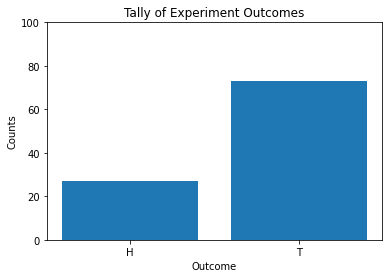

In [8]:
import matplotlib.pyplot as plt

def view_bars(experiment,ax=None):
    if not ax:
        ax = plt.axes(label='experiment_bar_viewer')
    outcomes = experiment.summary.keys()
    counts = experiment.summary.values()
    ax.bar(range(len(outcomes)),counts)
    ax.set_xticks([0,1])
    ax.set_xticklabels(outcomes)
    ax.set_title("Tally of Experiment Outcomes")
    ax.set_ylim([0,sum(counts)])
    ax.set_xlabel("Outcome")
    ax.set_ylabel("Counts")

view_bars(ce)

# Running the experiment multiple times

Now we'd like to run the experiment multiple times and see how the tallies vary between each run of the experiment.

<IPython.core.display.Javascript object>


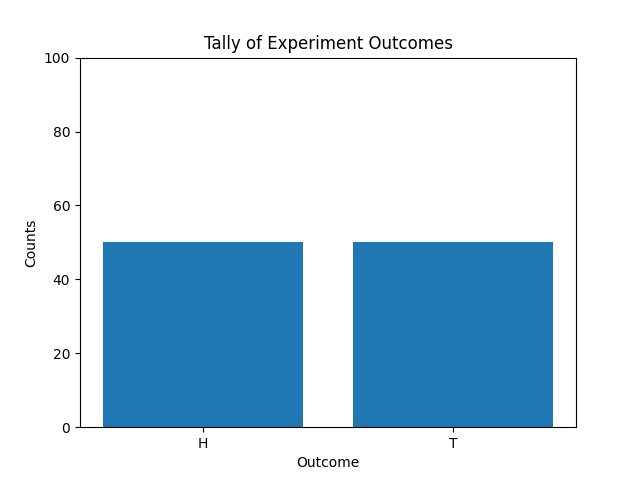

In [9]:
# Add some helpers so that we can view the plot interactively
import time 
%matplotlib notebook

# Let's make it a fair coin
faircoin = Coin(.5)
ce = CoinExperiment(faircoin,100)

ax = plt.axes()

for k in range(100):
    ce.run()
    ax.cla()
    view_bars(ce,ax)
    ax.get_figure().canvas.draw()
    time.sleep(.1)

# Now keep track of how many heads and how many tails with each experiment.

We need to modify our figure to add another axes with histogram of number of heads and number of tails.

<IPython.core.display.Javascript object>


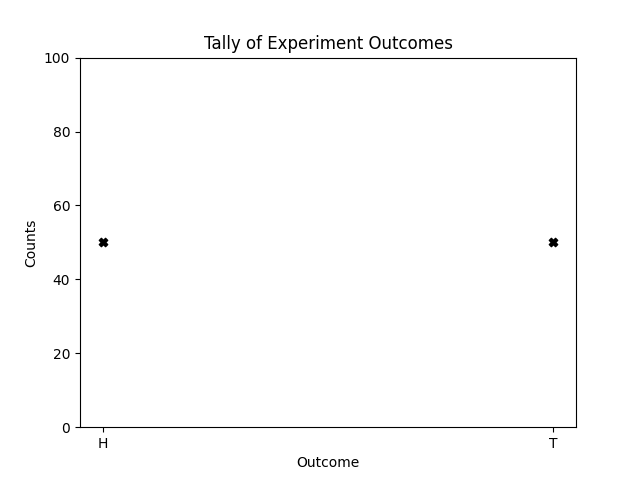

In [10]:
# New function to mark the number of heads and the number of tails for each experiment run
%matplotlib notebook

def view_x(experiment,ax=None):
    if not ax:
        ax = plt.axes(label='x_viewer')
    outcomes = experiment.summary.keys()
    counts = experiment.summary.values()
    ax.scatter(range(len(outcomes)),counts,marker='X',color='k')
    ax.set_xticks([0,1])
    ax.set_xticklabels(outcomes)
    ax.set_title("Tally of Experiment Outcomes")
    ax.set_ylim([0,sum(counts)])
    ax.set_xlabel("Outcome")
    ax.set_ylabel("Counts")

view_x(ce)



<IPython.core.display.Javascript object>


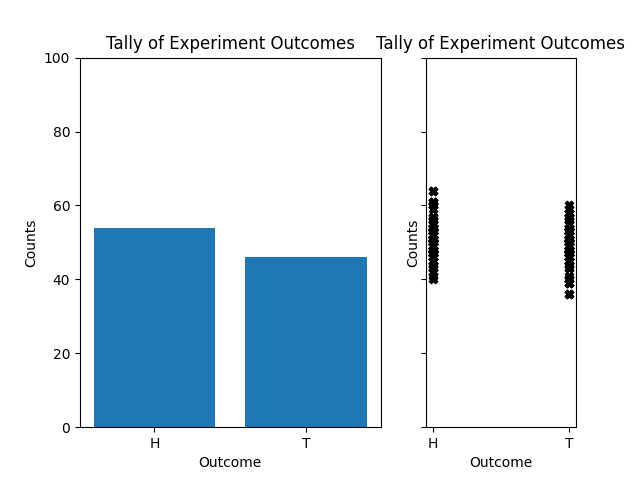

In [11]:
%matplotlib notebook
 
fig,axs = plt.subplots(1,2,sharey=True,gridspec_kw={'width_ratios':[2,1]})

for k in range(100):
    ce.run()
    axs[0].cla()
    view_bars(ce,axs[0])
    view_x(ce,axs[1])
    axs[0].get_figure().canvas.draw()
    time.sleep(.1)

# Change the experiment: now do 1000 flips

<IPython.core.display.Javascript object>


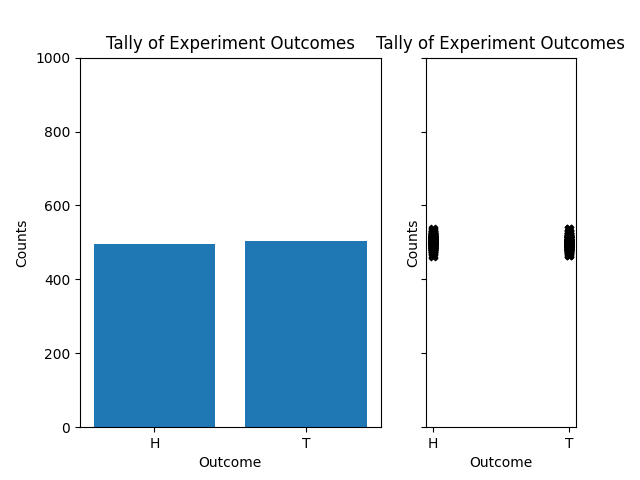

In [12]:
%matplotlib notebook

c = Coin(.5) 
ce = CoinExperiment(c,1000)

fig,axs = plt.subplots(1,2,sharey=True,gridspec_kw={'width_ratios':[2,1]})

for k in range(100):
    ce.run()
    axs[0].cla()
    view_bars(ce,axs[0])
    view_x(ce,axs[1])
    axs[0].get_figure().canvas.draw()
    time.sleep(.1)